File: Tokyo-Olympics-Tweets.ipynb  
Name: Corinne Medeiros  
Date: 8/8/21    
Desc: Analyzing Tweets from Tokyo Olympics   
Usage: Program imports and cleans data, generates charts, and calculates sentiment.

In [1]:
import pandas as pd
import numpy as np, re

import matplotlib.pyplot as plt
from matplotlib import cm

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
import itertools
import collections

import warnings
warnings.filterwarnings("ignore")

## Sentiment analysis of tweets about debut sports during the Tokyo 2020 Olympics  

### Data Source:  
**Tokyo Olympics 2020 Tweets**  
https://www.kaggle.com/gpreda/tokyo-olympics-2020-tweets

This dataset from Kaggle contains one csv file with over 150,000 tweets pulled from Twitter using the topic #Tokyo2020. Additional data about each tweet include username, user location, user description, hashtags, date, source, and more (see link above for a full list of available attributes). The data are collected using the Twitter API and the Tweepy Python library. The most updated pull comes from July 28, 2021, which is the version used for this project.

### Loading Data  

In [2]:
# Loading Tokyo Olympics Tweets data
fields = ['user_location', 'date', 'text', 'hashtags']
tokyo_df = pd.read_csv('tokyo_2020_tweets.csv', skipinitialspace=True, usecols=fields, 
                      dtype=str)

In [3]:
tokyo_df.head(20)

,user_location,date,text,hashtags
0,"Udupi, India",2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020']
1,"Manipur, India",2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020']
2,Global,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN
3,Lausanne,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN
4,Australia,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics..."
5,India,2021-07-24 10:45:42,#Tokyo2020 #Olympics\n#MirabaiChanu\n#Weightli...,"['Tokyo2020', 'Olympics', 'MirabaiChanu', 'Wei..."
6,City by the water,2021-07-24 10:27:14,Can't help but cheer for them. Banda 6 goals i...,NaN
7,Manila,2021-07-24 11:02:49,@inquirerdotnet @ftjochoaINQ Caloy Yulo's 14.0...,NaN
8,Lausanne,2021-07-24 11:02:49,Q3 🇨🇦 1-4 🇩🇪\n\nGreen card for Canada's captai...,"['Tokyo2020', 'CANvGER']"
9,"Puttur, Karnataka,India",2021-07-24 11:02:48,Hearty Congratulations to \nIndian Railways 🏋️...,NaN


### Text Cleanup

In [4]:
def clean_text(text):
    """
    Remove punctuation and special characters, make lower case
    Args: text 
    Output: text
    """
    text=str(text)
    text=text.lower()
    text=re.sub('</?.*?>',' <>', text)
    text=re.sub('\\d|\\W+|_',' ',text)
    text=re.sub('[^a-zA-Z]'," ", text)
    
    return text

# Create stop words list
stop_words = stopwords.words('english')

In [5]:
# Cleaning 'text' column
tokyo_df['text'] = tokyo_df['text'].apply(lambda x:clean_text(x))

# Preview data
tokyo_df.head()

,user_location,date,text,hashtags
0,"Udupi, India",2021-07-24 10:59:49,let the party begin tokyo,['Tokyo2020']
1,"Manipur, India",2021-07-24 10:58:45,congratulations tokyo https t co ofkms ukq,['Tokyo2020']
2,Global,2021-07-24 10:58:17,big breaking now tokyo olympic update japan wo...,NaN
3,Lausanne,2021-07-24 10:57:56,q great britain finally find a way way pi...,NaN
4,Australia,2021-07-24 10:52:51,all i can think of every time i watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics..."


### Filtering data by sport

#### Surfing

In [6]:
# Filtering to tweets including 'surf'
tokyo_surf_df = tokyo_df[tokyo_df['text'].str.contains("surf")]

tokyo_surf_df.head(20)

,user_location,date,text,hashtags
2199,"La Jolla, CA",2021-07-24 10:31:31,one big step for surfing tomorrow strongertoge...,"['Surfing', 'StrongerTogether', 'Tokyo2020', '..."
2303,NaN,2021-07-24 10:30:23,for the past two years endangered sea turtle n...,['surfing']
2491,"Bucks, UK",2021-07-24 10:28:27,a bit on tokyo s brushes with the local wi...,"['Tokyo2020', 'wildlife', 'olympics', 'surfing..."
2734,"Auckland, New Zealand",2021-07-24 10:24:52,fizzing surfing tokyo https t co fpsftsrert,"['surfing', 'Tokyo2020']"
3760,New Zealand,2021-07-24 10:10:40,the surfing at tokyo kicks off sunday morn...,['Tokyo2020']
4438,"Burtonsville, MD",2021-07-24 10:01:07,olympics in tokyo just kick off today loo...,"['Olympics', 'Tokyo2020', 'skateboarding', 'bm..."
5125,India,2021-07-24 09:53:42,in my stream surfing i ve somehow ended up on ...,"['basketball3x3', 'Tokyo2020']"
5266,"Seattle, WA",2021-07-24 09:52:12,olympics surfers are unsung masters of scienc...,['Olympics']
5632,Where the +Vibes are,2021-07-24 09:47:46,history in the making surfers inaugurate tokyo...,"['Surfers', 'Tokyo2020']"
5976,NaN,2021-07-24 09:43:51,rumours say wout van aert will be starring in ...,"['CyclingRoad', 'Tokyo2020']"


In [7]:
tokyo_surf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 2199 to 296995
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_location  1372 non-null   object
 1   date           1758 non-null   object
 2   text           1758 non-null   object
 3   hashtags       1293 non-null   object
dtypes: object(4)
memory usage: 68.7+ KB


#### Skateboarding

In [8]:
# Filtering to tweets including 'skateboarding'
tokyo_skateboarding_df = tokyo_df[tokyo_df['text'].str.contains("skateboarding")]

tokyo_skateboarding_df.head(20)

,user_location,date,text,hashtags
437,saw ac 020419; jb 111116 etc.,2021-07-24 10:56:04,tony and rayssa my new religion skateboarding ...,"['skateboarding', 'Tokyo2020']"
3084,"Athens, Greece",2021-07-24 10:19:21,so excited to watch skateboarding and bmxfrees...,"['skateboarding', 'bmxfreestyle', 'Olympics', ..."
3283,Austria,2021-07-24 10:16:21,who will go for the first ever olympic gold in...,"['skateboarding', 'Tokyo2020']"
4438,"Burtonsville, MD",2021-07-24 10:01:07,olympics in tokyo just kick off today loo...,"['Olympics', 'Tokyo2020', 'skateboarding', 'bm..."
4604,Germany,2021-07-24 09:59:44,skateboarding makes its debut at the olympics ...,['Olympics']
4777,"South West, England",2021-07-24 09:57:57,what time bst is the skateboarding at the olym...,"['Tokyo2020', 'skateboarding']"
6302,Cambs,2021-07-24 09:40:03,will definitely be watching the skateboarding ...,['Tokyo2020']
9917,London,2021-07-24 09:04:13,nyjah huston and skateboarding hit the olympic...,['Tokyo2020']
10557,UK,2021-07-24 11:33:26,merrily watching day of tokyo and lookin...,['Tokyo2020']
10721,Aylesbury,2021-07-24 11:30:41,can t wait for the skateboarding tokyo,['Tokyo2020']


In [9]:
tokyo_skateboarding_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3420 entries, 437 to 296492
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_location  2572 non-null   object
 1   date           3420 non-null   object
 2   text           3420 non-null   object
 3   hashtags       2956 non-null   object
dtypes: object(4)
memory usage: 133.6+ KB


### Text Mining

#### Surfing

In [10]:
# Remove stop words from 'txt', store in new column
tokyo_surf_df['text_no_stop_words'] = tokyo_surf_df.text.apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Preview data
print(tokyo_surf_df.head(20))

                 user_location                 date  \
2199              La Jolla, CA  2021-07-24 10:31:31   
2303                       NaN  2021-07-24 10:30:23   
2491                 Bucks, UK  2021-07-24 10:28:27   
2734     Auckland, New Zealand  2021-07-24 10:24:52   
3760               New Zealand  2021-07-24 10:10:40   
4438          Burtonsville, MD  2021-07-24 10:01:07   
5125                     India  2021-07-24 09:53:42   
5266               Seattle, WA  2021-07-24 09:52:12   
5632      Where the +Vibes are  2021-07-24 09:47:46   
5976                       NaN  2021-07-24 09:43:51   
6581               Seattle, WA  2021-07-24 09:37:09   
11703                   Israel  2021-07-24 11:15:00   
12813               Quilty 🇮🇪   2021-07-24 12:53:07   
14935  England, United Kingdom  2021-07-24 13:18:26   
15383        Florida/Illinois   2021-07-24 13:34:37   
15718            Mumbai, India  2021-07-24 13:38:39   
16622                      NaN  2021-07-24 13:58:40   
16671     

In [11]:
# Creating a list of lists containing words for each tweet
words_surf = [text.split() for text in tokyo_surf_df.text_no_stop_words]
words_surf[:3]

[['one',
  'big',
  'step',
  'surfing',
  'tomorrow',
  'strongertogether',
  'tokyo',
  'olympics',
  'https',
  'co',
  'xs',
  'oevl'],
 ['past',
  'two',
  'years',
  'endangered',
  'sea',
  'turtle',
  'nesting',
  'identified',
  'tsurigasaki',
  'beach',
  'surfing',
  'https',
  'co',
  'hjpz',
  'e'],
 ['bit',
  'tokyo',
  'brushes',
  'local',
  'wildlife',
  'https',
  'co',
  'jktqccarz',
  'olympics',
  'surfing',
  'spiders',
  'turtle',
  'ants',
  'insects']]

#### Skateboarding

In [12]:
# Remove stop words from 'txt', store in new column
tokyo_skateboarding_df['text_no_stop_words'] = tokyo_skateboarding_df.text.apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Preview data
print(tokyo_skateboarding_df.head(20))

                       user_location                 date  \
437    saw ac 020419; jb 111116 etc.  2021-07-24 10:56:04   
3084                  Athens, Greece  2021-07-24 10:19:21   
3283                         Austria  2021-07-24 10:16:21   
4438                Burtonsville, MD  2021-07-24 10:01:07   
4604                         Germany  2021-07-24 09:59:44   
4777             South West, England  2021-07-24 09:57:57   
6302                           Cambs  2021-07-24 09:40:03   
9917                          London  2021-07-24 09:04:13   
10557                             UK  2021-07-24 11:33:26   
10721                      Aylesbury  2021-07-24 11:30:41   
14685                  Illinois, USA  2021-07-24 13:21:59   
14737                       mongolia  2021-07-24 13:21:26   
14935        England, United Kingdom  2021-07-24 13:18:26   
15114                            NaN  2021-07-24 13:30:44   
15582            Cheltenham, England  2021-07-24 13:35:48   
15701               Phil

In [13]:
# Creating a list of lists containing words for each tweet
words_skateboarding = [text.split() for text in tokyo_skateboarding_df.text_no_stop_words]
words_skateboarding[:3]

[['tony',
  'rayssa',
  'new',
  'religion',
  'skateboarding',
  'tokyo',
  'https',
  'co',
  'zg',
  'itywrp'],
 ['excited',
  'watch',
  'skateboarding',
  'bmxfreestyle',
  'making',
  'olympics',
  'debuts',
  'tokyo'],
 ['go',
  'first',
  'ever',
  'olympic',
  'gold',
  'skateboarding',
  'tokyo',
  'pictograms',
  'seen',
  'https',
  'co',
  'gtdvslieaj']]

### Word Frequencies - Surfing Tweets

In [14]:
# List of all words across surfing tweets
words_surf_all = list(itertools.chain(*words_surf))

# Creating counter
counts_surf = collections.Counter(words_surf_all)

counts_surf.most_common(20)

[('surfing', 1608),
 ('co', 1297),
 ('https', 1296),
 ('tokyo', 1141),
 ('olympics', 435),
 ('olympic', 323),
 ('ever', 224),
 ('women', 194),
 ('one', 179),
 ('semifinals', 172),
 ('medal', 165),
 ('event', 164),
 ('history', 158),
 ('shame', 154),
 ('first', 153),
 ('happened', 152),
 ('unbelievable', 152),
 ('gold', 145),
 ('surf', 140),
 ('men', 138)]

In [15]:
# Creating dataframe from word counts list
counts_surf_df = pd.DataFrame(counts_surf.most_common(20),
                             columns=['words', 'count'])

counts_surf_df

,words,count
0,surfing,1608
1,co,1297
2,https,1296
3,tokyo,1141
4,olympics,435
5,olympic,323
6,ever,224
7,women,194
8,one,179
9,semifinals,172


In [16]:
# Saving common words dataframe to csv
counts_surf_df.to_csv('counts_surf_df.csv')

### Plotting Common Words - Surfing

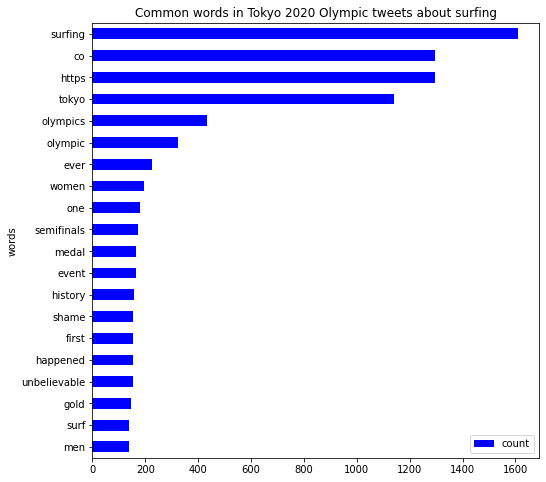

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
counts_surf_df.sort_values(by='count').plot.barh(x='words', 
                                                 y='count',
                                                 ax=ax,
                                                 color="blue")

ax.set_title("Common words in Tokyo 2020 Olympic tweets about surfing")

plt.show()

### Word Frequencies - Skateboarding Tweets

In [18]:
# List of all words across skateboarding tweets
words_skateboarding_all = list(itertools.chain(*words_skateboarding))

# Creating counter
counts_skateboarding = collections.Counter(words_skateboarding_all)

counts_skateboarding.most_common(20)

[('skateboarding', 3522),
 ('tokyo', 2651),
 ('co', 1981),
 ('https', 1979),
 ('olympics', 1133),
 ('street', 548),
 ('women', 545),
 ('gold', 498),
 ('olympic', 409),
 ('first', 344),
 ('didal', 320),
 ('old', 275),
 ('japan', 257),
 ('year', 250),
 ('medal', 243),
 ('margielyn', 242),
 ('nishiya', 216),
 ('yuto', 203),
 ('momiji', 202),
 ('ever', 187)]

In [19]:
# Creating dataframe from word counts list
counts_skateboarding_df = pd.DataFrame(counts_skateboarding.most_common(20),
                             columns=['words', 'count'])

counts_skateboarding_df

,words,count
0,skateboarding,3522
1,tokyo,2651
2,co,1981
3,https,1979
4,olympics,1133
5,street,548
6,women,545
7,gold,498
8,olympic,409
9,first,344


In [20]:
# Saving common words dataframe to csv
counts_skateboarding_df.to_csv('counts_skateboarding_df.csv')

### Plotting Common Words - Skateboarding

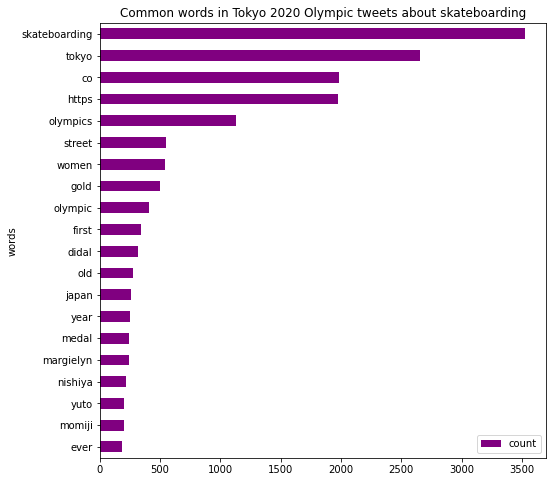

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
counts_skateboarding_df.sort_values(by='count').plot.barh(x='words', 
                                                          y='count',
                                                          ax=ax,
                                                          color="purple")

ax.set_title("Common words in Tokyo 2020 Olympic tweets about skateboarding")

plt.show()

Now that we have a better understanding of the content within surfing and skateboarding tweets, let's find out the general sentiment towards these two sports.

## Sentiment Analysis of Surfing Tweets

In [22]:
from textblob import TextBlob

In [23]:
# Create textblob objects of the tweets, store polarity values in new column
tokyo_surf_df['sentiment'] = tokyo_surf_df['text_no_stop_words'].apply(
    lambda tweet: TextBlob(tweet).sentiment.polarity)

In [24]:
tokyo_surf_df.head()

,user_location,date,text,hashtags,text_no_stop_words,sentiment
2199,"La Jolla, CA",2021-07-24 10:31:31,one big step for surfing tomorrow strongertoge...,"['Surfing', 'StrongerTogether', 'Tokyo2020', '...",one big step surfing tomorrow strongertogether...,0.00
2303,NaN,2021-07-24 10:30:23,for the past two years endangered sea turtle n...,['surfing'],past two years endangered sea turtle nesting i...,-0.25
2491,"Bucks, UK",2021-07-24 10:28:27,a bit on tokyo s brushes with the local wi...,"['Tokyo2020', 'wildlife', 'olympics', 'surfing...",bit tokyo brushes local wildlife https co jktq...,0.00
2734,"Auckland, New Zealand",2021-07-24 10:24:52,fizzing surfing tokyo https t co fpsftsrert,"['surfing', 'Tokyo2020']",fizzing surfing tokyo https co fpsftsrert,0.00
3760,New Zealand,2021-07-24 10:10:40,the surfing at tokyo kicks off sunday morn...,['Tokyo2020'],surfing tokyo kicks sunday morning nz time mak...,0.50


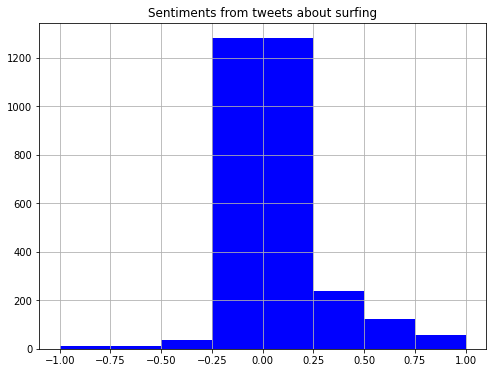

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
tokyo_surf_df['sentiment'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
                                ax=ax,
                                color="blue")

plt.title("Sentiments from tweets about surfing")
plt.show()

To make this easier to visualize and interpret, we'll remove observations with 0 polarity and create a break at 0.

In [26]:
# Remove polarity values equal to zero
tokyo_surf_df2 = tokyo_surf_df[tokyo_surf_df.sentiment != 0]

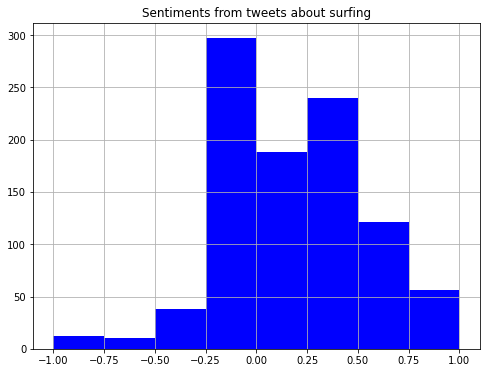

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tokyo_surf_df2['sentiment'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
                                 ax=ax,
                                 color="blue")

plt.title("Sentiments from tweets about surfing")
plt.show()

Now we're able to make out the polarity values much more easily. The majority of tweets about surfing are on the positive side of the scale.

In [28]:
# Saving surf dataframe to csv
tokyo_surf_df2.to_csv('tokyo_surf.csv')

## Sentiment Analysis of Skateboarding Tweets

In [29]:
# Create textblob objects of the tweets, store polarity values in new column
tokyo_skateboarding_df['sentiment'] = tokyo_skateboarding_df['text_no_stop_words'].apply(
    lambda tweet: TextBlob(tweet).sentiment.polarity)

In [30]:
tokyo_skateboarding_df.head()

,user_location,date,text,hashtags,text_no_stop_words,sentiment
437,saw ac 020419; jb 111116 etc.,2021-07-24 10:56:04,tony and rayssa my new religion skateboarding ...,"['skateboarding', 'Tokyo2020']",tony rayssa new religion skateboarding tokyo h...,0.136364
3084,"Athens, Greece",2021-07-24 10:19:21,so excited to watch skateboarding and bmxfrees...,"['skateboarding', 'bmxfreestyle', 'Olympics', ...",excited watch skateboarding bmxfreestyle makin...,0.375000
3283,Austria,2021-07-24 10:16:21,who will go for the first ever olympic gold in...,"['skateboarding', 'Tokyo2020']",go first ever olympic gold skateboarding tokyo...,0.250000
4438,"Burtonsville, MD",2021-07-24 10:01:07,olympics in tokyo just kick off today loo...,"['Olympics', 'Tokyo2020', 'skateboarding', 'bm...",olympics tokyo kick today looking forward debu...,0.000000
4604,Germany,2021-07-24 09:59:44,skateboarding makes its debut at the olympics ...,['Olympics'],skateboarding makes debut olympics skaters rep...,0.000000


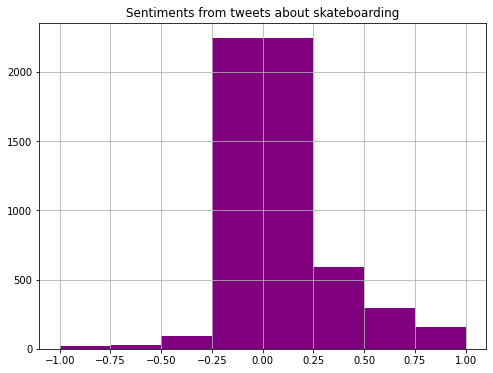

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
tokyo_skateboarding_df['sentiment'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
                                         ax=ax,
                                         color="purple")

plt.title("Sentiments from tweets about skateboarding")
plt.show()

In [32]:
# Remove polarity values equal to zero
tokyo_skateboarding_df2 = tokyo_skateboarding_df[tokyo_skateboarding_df.sentiment != 0]

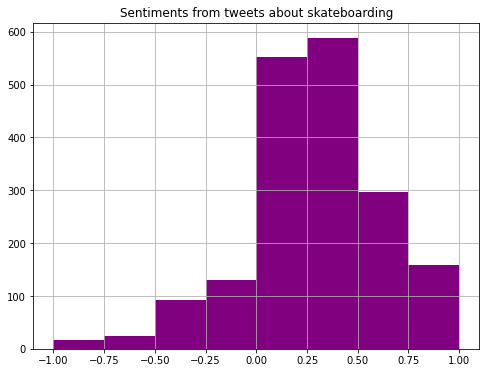

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tokyo_skateboarding_df2['sentiment'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
                                          ax=ax,
                                          color="purple")

plt.title("Sentiments from tweets about skateboarding")
plt.show()

The majority of the tweets about skateboarding are also positive.

In [34]:
# Saving skateboarding dataframe to csv
tokyo_skateboarding_df2.to_csv('tokyo_skateboarding.csv')

With my filtered and analyzed datasets saved, I'll use Tableau to explore the data further and create final visualizations.